In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import bisect
from collections import OrderedDict
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, LeakyReLU
import matplotlib.pyplot as plt
import bisect
from collections import OrderedDict
import seaborn as sns


In [15]:
# df = pd.read_csv(r'generated_datasets/statlog_with_outliers.csv')
df = pd.read_csv(r'generated_datasets/breast-cancer_with_outliers.csv')
# df = pd.read_csv(r'generated_datasets/covtype_with_outliers.csv')
# df = pd.read_csv(r'generated_datasets/kdd99_with_outliers.csv')

In [16]:
#accessing only numeric columns
df = df._get_numeric_data()
print(df)

#accessing only the result column
result = df['result']
#drop results column
df = df.drop(columns=['result'])


           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      915460          1       15.460         23.95          103.80   
1      868999          0        9.738         11.97           61.24   
2      869224          0       12.900         15.92           83.74   
3    91762702          1       24.630         21.60          165.50   
4      884689          0       11.520         14.93           73.87   
..        ...        ...          ...           ...             ...   
574   8912049          1       19.160         26.60          126.20   
575    908916          0       12.870         19.54           82.67   
576    901088          1       20.440         21.78          133.80   
577   8911230          0       11.330         14.16           71.79   
578    926125          1       20.920         25.09          143.00   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0        731.3          0.11830           0.18700        0.203000   
1        

In [17]:
#This step indicates conversion of df from csv file to dataframe
df = pd.DataFrame(df)
# checking datatypes using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       579 non-null    int64  
 1   diagnosis                579 non-null    int64  
 2   radius_mean              579 non-null    float64
 3   texture_mean             579 non-null    float64
 4   perimeter_mean           579 non-null    float64
 5   area_mean                579 non-null    float64
 6   smoothness_mean          579 non-null    float64
 7   compactness_mean         579 non-null    float64
 8   concavity_mean           579 non-null    float64
 9   concave points_mean      579 non-null    float64
 10  symmetry_mean            579 non-null    float64
 11  fractal_dimension_mean   579 non-null    float64
 12  radius_se                579 non-null    float64
 13  texture_se               579 non-null    float64
 14  perimeter_se             5

In [18]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,915460,1,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,...,17.11,36.33,117.70,909.4,0.1732,0.49670,0.5911,0.21630,0.3013,0.10670
1,868999,0,9.738,11.97,61.24,288.5,0.09250,0.04102,0.00000,0.00000,...,10.62,14.10,66.53,342.9,0.1234,0.07204,0.0000,0.00000,0.3105,0.08151
2,869224,0,12.900,15.92,83.74,512.2,0.08677,0.09509,0.04894,0.03088,...,14.48,21.82,97.17,643.8,0.1312,0.25480,0.2090,0.10120,0.3549,0.08118
3,91762702,1,24.630,21.60,165.50,1841.0,0.10300,0.21060,0.23100,0.14710,...,29.92,26.93,205.70,2642.0,0.1342,0.41880,0.4658,0.24750,0.3157,0.09671
4,884689,0,11.520,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,...,12.65,21.19,80.88,491.8,0.1389,0.15820,0.1804,0.09608,0.2664,0.07809


# Implementing ELM

In [19]:
# Define the ELMOutlierDetector class
class ELMOutlierDetector:
    def __init__(self, hidden_layer_size=100):
        self.hidden_layer_size = hidden_layer_size

    def fit(self, X):
        input_size = X.shape[1]
        self.hidden_weights = np.random.randn(input_size, self.hidden_layer_size)
        H = np.maximum(0, np.dot(X, self.hidden_weights))  # ReLU activation function
        self.output_weights = np.linalg.pinv(H)

    def predict(self, X):
        H = np.maximum(0, np.dot(X, self.hidden_weights))
        errors = np.linalg.norm(X - np.dot(H, self.hidden_weights), axis=1) #Euclidean distance
        return errors

In [20]:
# Instantiate and use ELMOutlierDetector
from numpy import percentile


elm_detector = ELMOutlierDetector(hidden_layer_size=df.shape[1])
elm_detector.fit(df)
outlier_scores = elm_detector.predict(df)

# Identify outliers
no_of_outliers=int(input("Enter the number of outliers you want to detect: "))
percentage=(len(outlier_scores)-no_of_outliers)/len(outlier_scores)*100
print(f"percentage {percentage}")
threshold = np.percentile(outlier_scores,percentage)
predicted_labels = (outlier_scores > threshold).astype(int)

percentage 96.54576856649395


In [21]:
predicted_points=[]
for i in range(len(predicted_labels)):
    if predicted_labels[i] == 1:
        predicted_points.append(df.iloc[i])
predicted_points = np.array(predicted_points)
predicted_points = np.array(predicted_points)

In [22]:
outlier_points=[]
for i in range(len(result)):
    if result[i] == -1:
        outlier_points.append(df.iloc[i])
outlier_points = np.array(outlier_points)

In [23]:
# print(df)
df=np.array(df)
print(df)

[[9.15460e+05 1.00000e+00 1.54600e+01 ... 2.16300e-01 3.01300e-01
  1.06700e-01]
 [8.68999e+05 0.00000e+00 9.73800e+00 ... 0.00000e+00 3.10500e-01
  8.15100e-02]
 [8.69224e+05 0.00000e+00 1.29000e+01 ... 1.01200e-01 3.54900e-01
  8.11800e-02]
 ...
 [9.01088e+05 1.00000e+00 2.04400e+01 ... 1.76500e-01 2.60900e-01
  6.73500e-02]
 [8.91123e+06 0.00000e+00 1.13300e+01 ... 1.11100e-02 2.75800e-01
  6.38600e-02]
 [9.26125e+05 1.00000e+00 2.09200e+01 ... 2.54200e-01 2.92900e-01
  9.87300e-02]]


# Result visualization

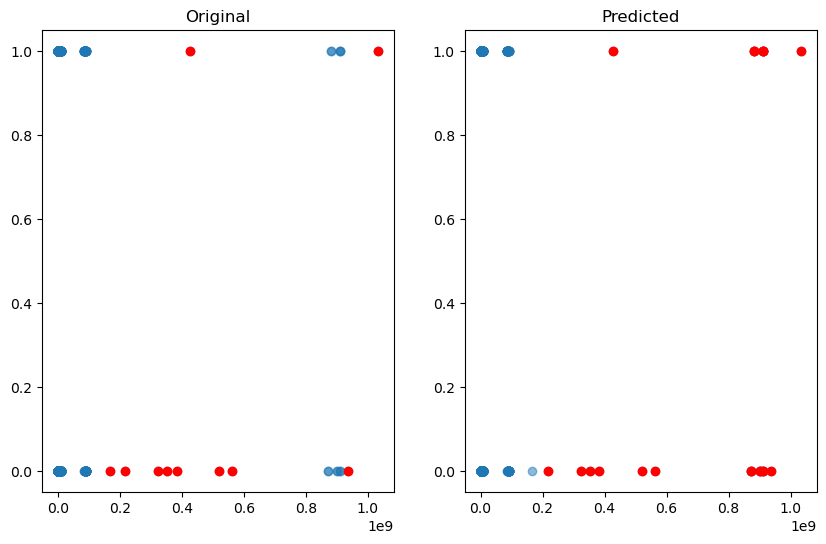

In [24]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(df[:, 0], df[:, 1], alpha=0.5)
plt.scatter(outlier_points[:, 0], outlier_points[:, 1], color='red')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.scatter(df[:, 0], df[:, 1], alpha=0.5)
plt.scatter(predicted_points[:, 0], predicted_points[:, 1], color='red')
plt.title('Predicted')
plt.show()


# Calculating Accuracy

In [25]:
# calculating accuracy using global outliers and original outliers
def accuracy(predicted_labels,result):
    count=0
    for i in range(len(predicted_labels)):
        if predicted_labels[i]==1 and result[i]==-1:
            count+=1
    return count/len(predicted_points)

# calculating precision and recall
def precision_recall(global_outliers,outliers):
    true_positive=0
    false_positive=0
    false_negative=0
    for i in range(len(global_outliers)):
        if global_outliers[i]==1 and outliers[i]==-1:
            true_positive+=1
        if global_outliers[i]==0 and outliers[i]==-1:
            false_positive+=1
        if global_outliers[i]==1 and outliers[i]==1:
            false_negative+=1
            
    precision=true_positive/(true_positive+false_positive)
    recall=true_positive/(true_positive+false_negative)
    return precision,recall

# calculating f1 score
def f1_score(precision,recall):
    return 2*((precision*recall)/(precision+recall))

precision,recall=precision_recall(predicted_labels,result)
print("Accuracy of the model is : ",accuracy(predicted_labels,result))    
print("Precision of the model is : ",precision)
print("Recall of the model is : ",recall)
print("F1 score of the model is : ",f1_score(precision,recall))


Accuracy of the model is :  0.45
Precision of the model is :  0.9
Recall of the model is :  0.45
F1 score of the model is :  0.6
